<a href="https://colab.research.google.com/github/JFGoes/PCT30038--CalculoNumerico/blob/master/MISistLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
Métodos iterativos para sistema lineares:
1 - Método de Jacobi
2 - Método de Gauss-Seidel

Autor: Prof. Josecley Fialho Góes
Data da última alteração: 02/12/2022
"""

import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Método de Jacobi
def jacobi(A,b,x0,tol,maxiter): 
  """
  Método de Jacobi
  Implementado a partir do livro de Cálculo Numéricos.
  autores: Marcia Aparecida Gomes Ruggiero
            Vera Lúcia da Rocha Lopes
  Edição: 2ª

  Variáveis de entrada:
  A           -- Matriz de coeficientes
  b           -- Vetor Independente
  x           -- Vetor chute inicial
  tol         -- Tolerância do erro
  maxiter     -- iteração máxima

  variáveis de Saída:
  sol         -- Vetor solução
  solx        -- Vetor solução por iteração
  iter        -- Qtde de iterações
  """
  # Melhorar a precisão de float para double
  A = A.astype('double')  
  b = b.astype('double')  
  x0 = x0.astype('double')  
  # retorna a quantidade de variáveis
  # cria um vetor para salvar a solução
  n=np.shape(A)[0]  
  x = np.zeros(n)  
  # Para o plot das raizes x iterações
  solx = []
  # Create List of list
  for i in range(n+1):
    solx.append([])
  for j in range(n):
    solx[j].append(x0[j])
  #iteracoes
  iter = 0  
  solx[n].append(iter)
  while (iter < maxiter):            
    #iteracao de Jacobi  
    for i in np.arange(n):  
      x[i] = b[i]  
      for j in np.concatenate((np.arange(0,i),np.arange(i+1,n))):  
        x[i] -= A[i,j]*x0[j]  #somatorio de A_ij * x0_j
      x[i] /= A[i,i]  #divisão  de bi menos somatório de A_ij * x0_j por a_ii
        
         
    iter = iter+1
    for i in range(n):
      solx[i].append(x[i])
    solx[n].append(iter)
    #tolerancia  
    if (np.linalg.norm(x-x0,np.inf) < tol):  
      print(f'Iterações = {iter}')
      print(f'Solução: {["%.4f"% xi for xi in x]}')
      for i in range(n):
        plt.plot(solx[n],solx[i],label='x'+str(i+1))
      plt.xlabel('Iter')
      plt.ylabel('sol')
      plt.legend()
      plt.grid()
      return (x ,solx, iter)
    #prepara nova iteracao  
    x0 = np.copy(x) 
  raise NameError('num. max. de iteracoes excedido.')

In [3]:
# Método de Gauss-Seidel
def GSeidel(A,b,x,imax,es,rlambda):
  """
  Método de Gaus-Seidel com relaxamento: xi_novo = λxi_novo + (1 − λ)xi_velho
  Implementado a partir do livro de Métodos Numéricos para engenharia, pag 255.
  autores: Steven C. Chapra e Raymond P. Canale
  Edição: 5ª

  Variáveis de entrada:
  A           -- Matriz de coeficientes
  b           -- Vetor Independente
  x           -- Vetor chute inicial
  imax        -- iteração máxima
  es          -- Tolerância do erro
  rlambda     -- variável de relaxamento

  variáveis de Saída:
  sol         -- Vetor solução
  solx        -- Vetor solução por iteração
  iter        -- Qtde de iterações
  """
  # Melhorar a precisão de float para double
  A = A.astype('double') 
  b = b.astype('double')  
  x = x.astype('double') 
  # retorna a quantidade de variáveis
  n=np.shape(A)[0]
  solx = []
  # Create List of list
  for i in range(n+1):
    solx.append([])
  for j in range(n):
      solx[j].append(x[j])
   

  for i in range(n):
    dummy = A[i][i]
    for j in range(n):
      A[i][j]= A[i][j]/dummy

    b[i]= b[i]/dummy
  
  for i in range(n):
    soma = b[i]
    for j in np.concatenate((np.arange(0,i),np.arange(i+1,n))):
      soma = soma - A[i][j]*x[j]
    x[i] = soma
    
  iter = 0
  solx[n].append(iter)

  while True:
    sentinela = 1
    for i in range(n):
      old = x[i]
      soma = b[i]
      for j in np.concatenate((np.arange(0,i),np.arange(i+1,n))):
        soma = soma - A[i][j]*x[j]
      x[i] = rlambda * soma  + (1. - rlambda) * old
      
      if sentinela == 1 and x[i] != 0.:
        ea = np.fabs((x[i] - old)/x[i])*100
        
        if ea > es:
          sentinela = 0
    iter = iter + 1
    for i in range(n):
      solx[i].append(x[i])    
    solx[n].append(iter)
    if sentinela == 1 or iter >= imax:
      print(f'Iterações = {iter}')
      print(f'Solução: {["%.4f"% xi for xi in x]}')
      #print(solx)
      for i in range(n):
        plt.plot(solx[n],solx[i],label='x'+str(i+1))
      plt.xlabel('Iter')
      plt.ylabel('sol')
      plt.legend()
      plt.grid()

      return (x ,solx, iter)

# Funções testes para os dois métodos

1 - Gauss-Seidel
2 - Jacobi
Qual método? (1 ou 2 ): 2
Método de Jacobi - Exemplo: 
       9 x1 − 2 x2 +  3 x3 +  2 x4 = 54,5
       2 x1 + 8 x2 −  2 x3 +  3 x4 = −14
      −3 x1 + 2 x2 + 11 x3 −  4 x4 = 12
      −2 x1 + 3 x2 +  2 x3 + 10 x4 = −21
      
Iterações = 14
Solução: ['4.9995', '-1.9998', '2.5001', '-1.0002']


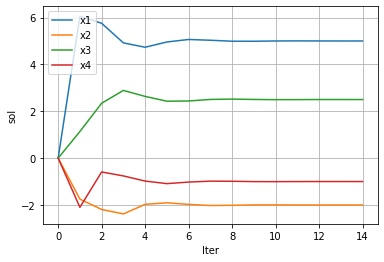

In [5]:
if __name__ == '__main__':
  print("1 - Gauss-Seidel\n2 - Jacobi")
  metodo = int(input("Qual método? (1 ou 2 ): "))

  if metodo == 1:
    print("""Método de Gaus Seidel - Exemplo: 
       9 x1 − 2 x2 +  3 x3 +  2 x4 = 54,5
       2 x1 + 8 x2 −  2 x3 +  3 x4 = −14
      −3 x1 + 2 x2 + 11 x3 −  4 x4 = 12
      −2 x1 + 3 x2 +  2 x3 + 10 x4 = −21
      """)
    
    A = np.array([[9.0,-2.0,3.0,2.0],[2.0,8.0,-2.0,3.0],[-3.0,2.0,11.0,-4.0],[-2.0,3.0,2.0,10.0]])
    b = np.array([54.5,-14.0,12.5,-21.0])
    x = np.array([0.,0.,0.,0.])
    rlambda = 1
    es = 0.0001
    sol,solx,iter = GSeidel(A,b,x,100,es,rlambda)
  elif metodo == 2:
    print("""Método de Jacobi - Exemplo: 
       9 x1 − 2 x2 +  3 x3 +  2 x4 = 54,5
       2 x1 + 8 x2 −  2 x3 +  3 x4 = −14
      −3 x1 + 2 x2 + 11 x3 −  4 x4 = 12
      −2 x1 + 3 x2 +  2 x3 + 10 x4 = −21
      """)
    A = np.array([[9.0,-2.0,3.0,2.0],[2.0,8.0,-2.0,3.0],[-3.0,2.0,11.0,-4.0],[-2.0,3.0,2.0,10.0]])
    b = np.array([54.5,-14.0,12.5,-21.0])
    x = np.array([0.,0.,0.,0.])
    tol = 0.001
    sol,solx,iter = jacobi(A,b,x,tol,100)
